In [26]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import *
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-06-28 11:16:19,526: Credentials are already in use. The existing account in the session will be replaced.


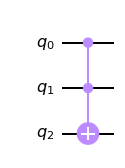

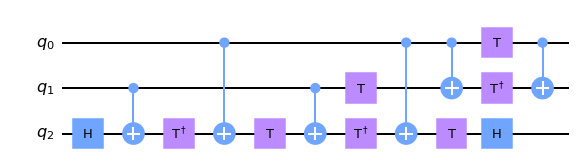

In [27]:
qc_and = QuantumCircuit(3)
qc_and.ccx(0,1,2)

display(qc_and.draw())

qc_and.decompose().draw()

In [28]:
from qiskit.tools.monitor import job_monitor

In [4]:
def AND(inp1, inp2, backend, layout):
    
    qc = QuantumCircuit(3, 1) 
    qc.reset(range(3))
    
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
        
    qc.barrier()
    qc.ccx(0, 1, 2) 
    qc.barrier()
    qc.measure(2, 0) 
  
    qc_trans = transpile(qc, backend, initial_layout=layout, optimization_level=3)
    job = backend.run(qc_trans, shots=8192)
    print(job.job_id())
    job_monitor(job)
    
    output = job.result().get_counts()
    
    return qc_trans, output

In [22]:
from qiskit import QuantumCircuit
from qiskit.compiler import transpile
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import Unroller
qc = QuantumCircuit(4,2)
qc.x(0)
# qc.h(1)
# qc.h(2)
# qc.h(3)
qc.ccx(0, 1, 3)
qc.cx(0, 1)
qc.ccx(1, 2, 3)
qc.cx(1, 2)
qc.measure([2, 3], [1, 0])

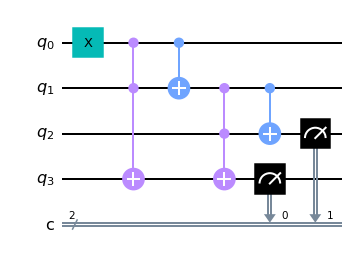

In [29]:
%matplotlib inline
qc.draw(output='mpl')

In [30]:
provider = IBMQ.get_provider(hub ='ibm-q', group='open', project='main')
backend = provider.get_backend('ibm_nairobi')


Total count for 00 and 11 are: {'00': 498, '01': 408, '10': 2461, '11': 633}


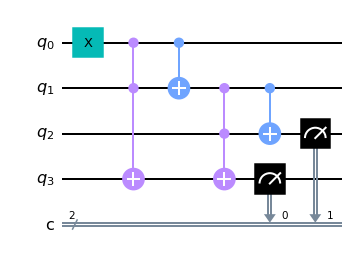

In [23]:
job = execute(qc, backend)
result = job.result()
counts = result.get_counts(qc)
print("\nTotal count for 00 and 11 are:",counts)
qc.draw()

In [32]:
re_transpile = transpile(qc, backend)
re_transpile.draw(output='mpl', idle_wires=False)

In [34]:
re_transpile = transpile(qc, backend, optimization_level = 3)
# re_transpile.draw(output='mpl', idle_wires=False)

In [35]:

job = execute(re_transpile, backend)
result = job.result()
counts = result.get_counts(re_transpile)
print("\nTotal count for 00 and 11 are:",counts)
# re_transpile.draw()


Total count for 00 and 11 are: {'00': 363, '01': 226, '10': 3095, '11': 316}


Traceback (most recent call last):
  Input In [36] in <cell line: 1>
    re_transpile.draw(output='mpl', idle_wires=False)
  File /opt/conda/lib/python3.8/site-packages/qiskit/circuit/quantumcircuit.py:1835 in draw
    return circuit_drawer(
  File /opt/conda/lib/python3.8/site-packages/qiskit/visualization/circuit_visualization.py:231 in circuit_drawer
    image = _matplotlib_circuit_drawer(
  File /opt/conda/lib/python3.8/site-packages/qiskit/visualization/circuit_visualization.py:601 in _matplotlib_circuit_drawer
    return qcd.draw(filename)
  File /opt/conda/lib/python3.8/site-packages/qiskit/visualization/matplotlib.py:323 in draw
    max_anc = self._get_coords(n_lines)
  File /opt/conda/lib/python3.8/site-packages/qiskit/visualization/matplotlib.py:579 in _get_coords
    q_indxs.append(self._wire_map[qarg])
KeyError: Qubit(QuantumRegister(7, 'q'), 0)

Use %tb to get the full traceback.


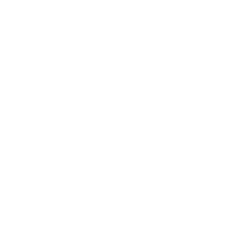

In [36]:
re_transpile.draw(output='mpl', idle_wires=False)